# Proyek kedua Anime Recomendation-Arip Kristiyanto


*   Nama : Arip Kristiyanto
*   Jenis Kelamin : Laki-Laki
*   Institusi : Universitas Pamulang



# **Import Librabry**

In [ ]:
import tensorflow
from keras import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
from zipfile import ZipFile
from tensorflow import keras
from keras import layers
from pathlib import Path
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import ast
import warnings
from sklearn.model_selection import train_test_split

# Import Datasets

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
rating_df = pd.read_csv('/content//drive/MyDrive/dataset/rating.csv')

In [ ]:
anime_df = pd.read_csv('/content//drive/MyDrive/dataset/anime.csv')



Kedua sudah berhasil di-import kedalam notebook.

*   movies.csv menjadi dataframe dengan nama anime_df
*   ratings.csv menjadi dataframe dengan nama rating_df





  



In [ ]:
anime_df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [ ]:
rating_df.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


# Data Understanding

Dataset yang digunakan untuk pembuatan model system recommendation ini adalah dataset "Movie Magic: Data-Driven Recommendations" yang tersedia di situs[ kaggle](https://www.kaggle.com/code/dumanmesut/anime-recomendation-systems) yang berisi data-data mengenai movie beserta ratingd yang diberikan oleh para pembaca.

Terdapat 2 file didalamnya,  dataset animes.csv dan rating.csv. animes terdiri dari , baris 12294 data dan 7 kolom data. rating.csv terdiri dari 93045 baris data dan 3 kolom data.

Kedua dataset tersebut dapat digunakan untuk membuat system recommendation, baik Content-Based Filtering maupun Collaborative Filtering

Berikut ini adalah infomasi lainnya mengenai atribut-atribut yang terdapat pada dua dataset tersebut:

Atribut-atribut pada anime_df.csv:

* anime_id - identifikasi unik anime
* name - full name .
* genre - genre dari anime
* type - movie, TV, OVA, etc.
* episodes - berapa banyak episode dalam acara ini. (1 jika film)
* rating - peringkat rata-rata dari 10 untuk anime
* members - umlah anggota komunitas yang ada di grup anime

Atribut-atribut pada rating_df.csv:

* user_id - ID pengguna yang dibuat secara acak.
* anime_id - anime yang diberi peringkat oleh pengguna ini.
* rating - Peringkat dari 10 yang diberikan pengguna ini (-1 jika pengguna menontonnya tetapi tidak memberikan peringkat).




## Exploratory Data Analysis

Exploratory Data Analysis (EDA) adalah pendekatan analisis data yang bertujuan untuk memahami karakteristik utama dari kumpulan data. EDA melibatkan penggunaan teknik statistik dan visualisasi grafis untuk menemukan pola, hubungan, atau anomali untuk membentuk hipotesis. Proses ini sering kali tidak terstruktur dan dianggap sebagai langkah awal penting dalam analisis data yang membantu menentukan arah analisis lebih lanjut.

**anime_df**

In [ ]:
# Menampilan jumlah baris dan kolom yang ada pada dataset

anime_df.shape

(12294, 7)


Berdasarkan output diatas, movies_df memiliki:

  
  * 12294 baris data
  * 7 kolom data



In [ ]:
# Menampilkan kolom-kolom yang ada pada dataset

anime_df.keys()

Index(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members'], dtype='object')

In [ ]:
# Menampilkan tipe data dari setiap kolom yang ada

anime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


Berdasarkan output diatas 1 kolom bertipe data `float64` 4 kolom bertipe data `object` 2 kolom bertipe data `int64`

In [ ]:
print('Banyak genre: ', len(anime_df.genre.unique()))
print('Tipe : ', anime_df.genre.unique())

Banyak genre:  3265
Tipe :  ['Drama, Romance, School, Supernatural'
 'Action, Adventure, Drama, Fantasy, Magic, Military, Shounen'
 'Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen' ...
 'Hentai, Sports' 'Drama, Romance, School, Yuri' 'Hentai, Slice of Life']


Berdasarkan output diatas, animw_df terdapat 3265 genres

**ratings_df**

In [ ]:
# Menampilan jumlah baris dan kolom yang ada pada dataset

rating_df.shape

(93045, 3)



Berdasarkan output diatas, movies_df memiliki:

  * 93045 baris data
  * 3 kolom data



In [ ]:
# Menampilkan kolom-kolom yang ada pada dataset

rating_df.keys()

Index(['user_id', 'anime_id', 'rating'], dtype='object')

Berdasarkan output diatas terdapat 4 kolom

In [ ]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93045 entries, 0 to 93044
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   user_id   93045 non-null  int64
 1   anime_id  93045 non-null  int64
 2   rating    93045 non-null  int64
dtypes: int64(3)
memory usage: 2.1 MB


Berdasarkan output diatas, rating_df memiliki 3 kolom dengan tipe data `int64`
   


In [ ]:
rating_df['rating'].describe()

,rating
count,93045.000000
mean,6.114826
std,3.778899
min,-1.000000
25%,6.000000
50%,8.000000
75%,9.000000
max,10.000000




Fungsi diatas memberikan informasi statistika deskriptif untuk kolom rating, yaitu:

* count : Jumlah data dari sebuah kolom
* mean : Rata-rata dari sebuah kolom
* std : Standar deviasi dari sebuah kolom
* min : Nilai terendah pada sebuah kolom
* 25% : Nilai kuartil pertama (Q1) dari sebuah kolom
* 50% : Nilai kuartil kedua (Q2) atau median atau nilai tengah dari sebuah kolom
* 75% : Nilai kuartil ketiha (Q3) dari sebuah kolom
* max : Nilai tertinggi pada sebuah kolom




In [ ]:
anime_df.groupby('genre')['genre'].agg('count')

,genre
genre,
Action,53
"Action, Adventure",15
"Action, Adventure, Cars, Comedy, Sci-Fi, Shounen",2
"Action, Adventure, Cars, Mecha, Sci-Fi, Shounen, Sports",1
"Action, Adventure, Cars, Sci-Fi",1
...,...
"Super Power, Supernatural, Vampire",1
Supernatural,14
Thriller,1


In [ ]:
# Menampilakn total unique value di kolom user

print(rating_df['user_id'].nunique())

958


Berdasarkan output diatas, rating_df memiliki 958 user_id secara unique dari keseluruhan dataset. Hal ini berarti ada 958 user yang memberikan review terhadap film-film yang mereka telah tonton.

## Data Visualization



Visualisasi data adalah proses representasi grafis dari informasi dan data. Dengan menggunakan elemen visual seperti grafik, diagram, dan peta, visualisasi data menyediakan cara yang intuitif dan mudah diakses untuk melihat dan memahami tren, anomali, dan pola dalam data. Tujuan utama dari visualisasi data adalah untuk mengkomunikasikan informasi secara jelas dan efisien kepada pengguna, sehingga memudahkan pemahaman, analisis, dan pengambilan keputusan berdasarkan data tersebut



**anime_df**

**Univariate Analysis**


Univariate Analysis adalah jenis analisis data yang memeriksa satu variabel (atau bidang data) pada satu waktu. Tujuannya adalah untuk menggambarkan data dan menemukan pola yang ada dalam distribusi variabel tersebut. Ini termasuk penggunaan statistik deskriptif, histogram, dan box plots untuk menganalisis distribusi dan memahami sifat dari variabel tersebut.

<ipython-input-124-19c5c87c3dc6>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ona = anime_df.loc[anime_df['type'] == 'ONA'].count()[0]
<ipython-input-124-19c5c87c3dc6>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tv = anime_df.loc[anime_df['type'] == 'TV'].count()[0]
<ipython-input-124-19c5c87c3dc6>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  movie = anime_df.loc[anime_df['type'] == 'Movie'].count()[0]
<ipython-input-12

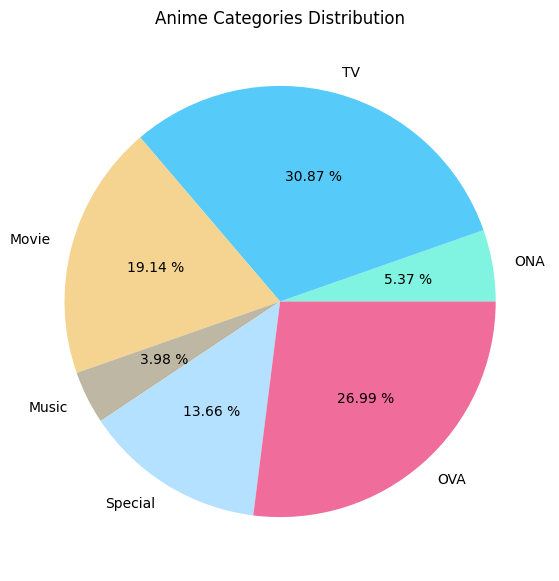

In [ ]:
# Anime Categories Distribution
from pandas.core.tools.datetimes import overload
ona = anime_df.loc[anime_df['type'] == 'ONA'].count()[0]
tv = anime_df.loc[anime_df['type'] == 'TV'].count()[0]
movie = anime_df.loc[anime_df['type'] == 'Movie'].count()[0]
music = anime_df.loc[anime_df['type'] == 'Music'].count()[0]
special = anime_df.loc[anime_df['type'] == 'Special'].count()[0]
ova = anime_df.loc[anime_df['type'] == 'OVA'].count()[0]

labels = ['ONA', 'TV', 'Movie', 'Music', 'Special', 'OVA']
colors = ['#81F4E1', '#56CBF9', '#F5D491', '#BEB7A4', '#B4E1FF', '#F06C9B']

plt.figure(figsize = (10,7))
plt.title('Anime Categories Distribution')
plt.pie([ona, tv, movie, music, special, ova],
        labels = labels,
        colors = colors,
        autopct = '%.2f %%'
        )

plt.show()


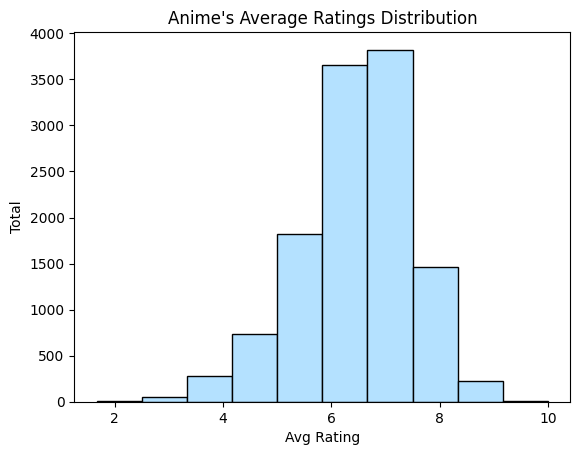

In [ ]:
# Anime's Average Ratings Distribution
plt.hist(anime_df.rating, color='#B4E1FF', edgecolor='black')
plt.ylabel('Total')
plt.xlabel('Avg Rating')
plt.title("Anime's Average Ratings Distribution")
plt.show()

**rating_df**



Univariate Analysis

Univariate Analysis adalah jenis analisis data yang memeriksa satu variabel (atau bidang data) pada satu waktu. Tujuannya adalah untuk menggambarkan data dan menemukan pola yang ada dalam distribusi variabel tersebut. Ini termasuk penggunaan statistik deskriptif, histogram, dan box plots untuk menganalisis distribusi dan memahami sifat dari variabel tersebut.


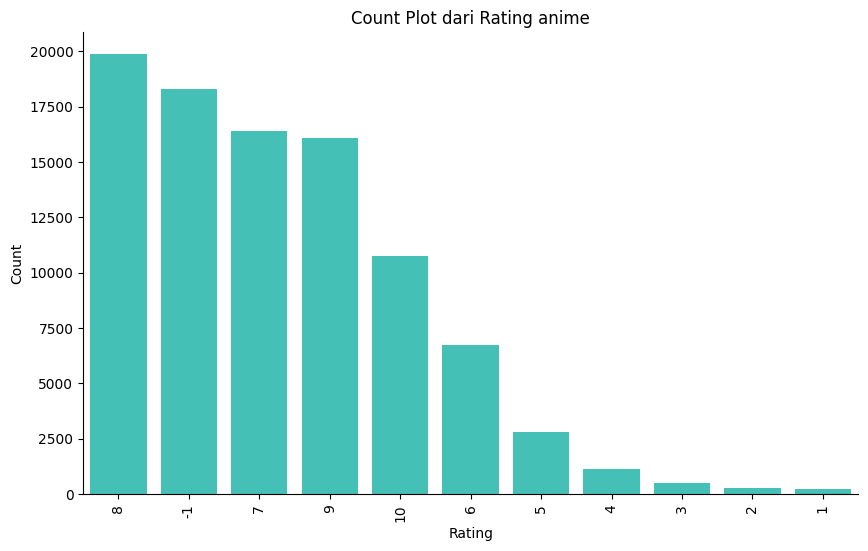

In [ ]:
plt.figure(figsize=(10, 6))
review_counts = rating_df['rating'].value_counts()
review_counts_sorted = review_counts.sort_values(ascending=False)
sns.countplot(x='rating', data=rating_df, color='#30D5C8', order=review_counts_sorted.index)
sns.despine()
plt.title('Count Plot dari Rating anime')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

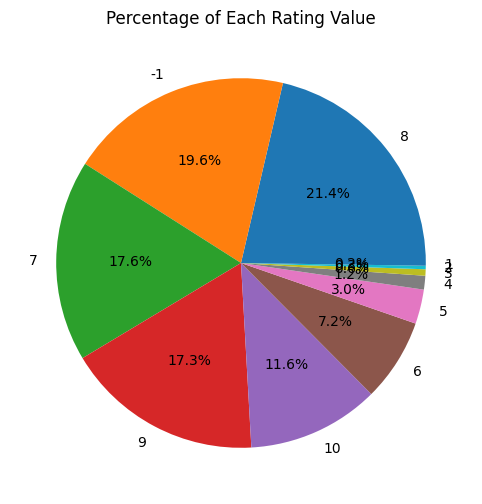

In [ ]:
rating_percentages = rating_df['rating'].value_counts(normalize=True) * 100
plt.figure(figsize=(8, 6))
rating_percentages.plot.pie(autopct='%1.1f%%')
plt.title('Percentage of Each Rating Value')
plt.ylabel('')
plt.show()

**Multivariate Analysis**

Multivariate Analysis adalah prosedur statistik yang digunakan untuk memeriksa hubungan antara beberapa variabel secara bersamaan. Teknik ini mencakup berbagai metode seperti regresi berganda, analisis faktor, dan analisis kluster, yang membantu dalam memahami struktur dan pola yang kompleks dalam data dengan lebih dari satu variabel.

In [ ]:
# Top 10 Anime Community
anime_df.sort_values(by='members', ascending=False).head(10)

,anime_id,name,genre,type,episodes,rating,members
40,1535,Death Note,"Mystery, Police, Psychological, Supernatural, ...",TV,37,8.71,1013917
86,16498,Shingeki no Kyojin,"Action, Drama, Fantasy, Shounen, Super Power",TV,25,8.54,896229
804,11757,Sword Art Online,"Action, Adventure, Fantasy, Game, Romance",TV,25,7.83,893100
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
159,6547,Angel Beats!,"Action, Comedy, Drama, School, Supernatural",TV,13,8.39,717796
19,1575,Code Geass: Hangyaku no Lelouch,"Action, Mecha, Military, School, Sci-Fi, Super...",TV,25,8.83,715151
841,20,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
445,10620,Mirai Nikki (TV),"Action, Mystery, Psychological, Shounen, Super...",TV,26,8.07,657190
131,4224,Toradora!,"Comedy, Romance, School, Slice of Life",TV,25,8.45,633817


Menampilkan daftar anime dengan jumlah anggota community terbanyak. Misalnya, anime Death Note memiliki jumlah anggota community terbanyak, yaitu sebesar 1013917.

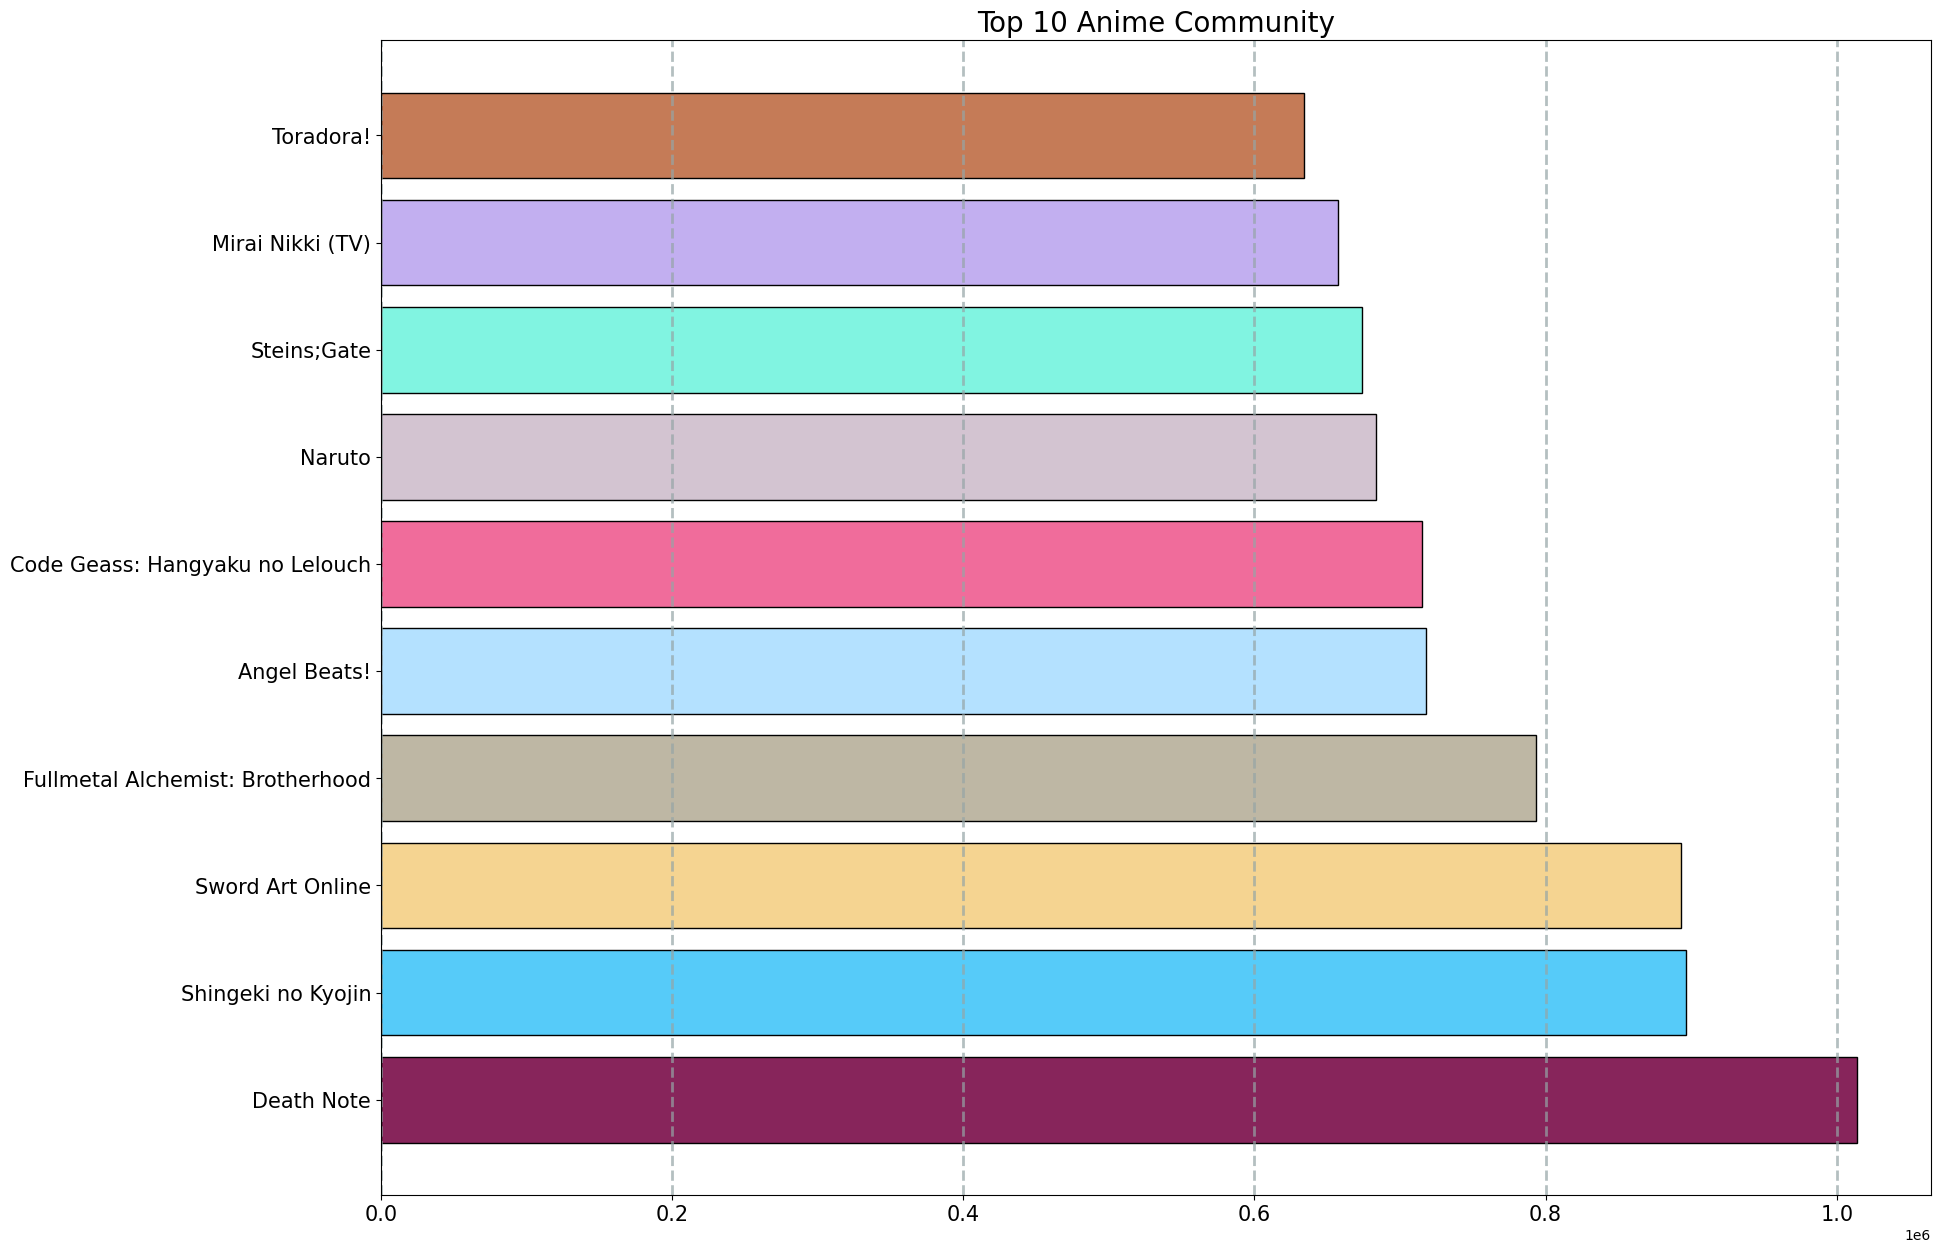

In [ ]:
# Top 10 Anime Community Plot
plt.figure(figsize = (20,15))
top10_anime = anime_df[['name', 'members']].sort_values(by = 'members',ascending = False).head(10)

colors = ['#87255B', '#56CBF9', '#F5D491', '#BEB7A4', '#B4E1FF', '#F06C9B', '#D3C4D1', '#81F4E1', '#C2AFF0', '#C57B57']


labels = top10_anime[['name']].values.flatten()
values = top10_anime[['members']].values.flatten()

plt.barh(labels, values, color = colors, edgecolor='black')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='x', alpha=0.7)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title("Top 10 Anime Community", fontdict = {'fontsize' : 20})
plt.show()

plt.show()



## Missing value


Missing Values adalah data yang hilang atau tidak tercatat dalam dataset. Hal ini bisa terjadi karena berbagai alasan, seperti kesalahan entri data, kerusakan data, atau tidak tersedianya informasi saat pengumpulan data. Missing values dapat mempengaruhi kualitas model machine learning dan hasil analisis statistik. Oleh karena itu, penting untuk mengidentifikasi, menganalisis, dan mengatasi missing values dengan metode seperti imputasi, di mana nilai yang hilang diganti dengan estimasi, atau dengan menghapus baris atau kolom yang terdampak.

**anime_df**

In [ ]:
anime_df.isnull().sum()

,0
anime_id,0
name,0
genre,62
type,25
episodes,0
rating,230
members,0


Berdasarkan hasil diatas, terdapat  3 missing values yaitu `genre ` `type` `rating`

**rating_df**

In [ ]:
rating_df.isnull().sum()

,0
user_id,0
anime_id,0
rating,0


Berdasarkan data diatas tidak ditemukan missing values

## Duplikat data



Data duplikat adalah baris data yang sama persis untuk setiap variabel yang ada. Dataset yang digunakan perlu diperiksa juga apakah dataset memiliki data yang sama atau data duplikat. Jika ada, maka data tersebut harus ditangani dengan menghapus data duplikat tersebut.

Alasan: Data duplikat perlu didektesi dan dihapus karena jika dibiarkan pada dataset dapat membuat model Anda memiliki bias, sehingga menyebabkan overfitting. Dengan kata lain, model memiliki performa akurasi yang baik pada data pelatihan, tetapi buruk pada data baru. Menghapus data duplikat dapat membantu memastikan bahwa model Anda dapat menemukan pola yang ada lebih baik lagi.


In [ ]:
# Cek baris duplikat dalam dataset
duplicates_anime = anime_df.duplicated()

# Hitung jumlah baris duplikat
duplicate_anime = duplicates_anime.sum()

# Cetak jumlah baris duplikat
print(f"Number of duplicate rows: {duplicate_anime}")

Number of duplicate rows: 0


Berdasarkan hasil tersebut, tidak ditemukan adanya data duplikat, maka tidak ada juga proses penghapusannya.

**rating_df**


In [ ]:
# Cek baris duplikat dalam dataset
duplicates_rating =rating_df.duplicated()

# Hitung jumlah baris duplikat
duplicate_rating = duplicates_rating.sum()

# Cetak jumlah baris duplikat
print(f"Number of duplicate rows: {duplicate_rating}")

Number of duplicate rows: 0


Berdasarkan hasil tersebut, ditemukan 1 data duplicate

## Outliers

Outliers adalah titik data yang secara signifikan berbeda dari sebagian besar data dalam kumpulan data. Outliers dapat muncul karena variasi dalam pengukuran atau mungkin menunjukkan kesalahan eksperimental; dalam beberapa kasus, outliers bisa juga menunjukkan variabilitas yang sebenarnya dalam data. Penting untuk menganalisis outliers karena mereka dapat memiliki pengaruh besar pada hasil analisis statistik.

Outliers adalah titik data yang secara signifikan berbeda dari sebagian besar data dalam kumpulan data. Outliers dapat muncul karena variasi dalam pengukuran atau mungkin menunjukkan kesalahan eksperimental; dalam beberapa kasus, outliers bisa juga menunjukkan variabilitas yang sebenarnya dalam data. Penting untuk menganalisis outliers karena mereka dapat memiliki pengaruh besar pada hasil analisis statistik.

Proses pembersihan outliers menggunakan metode IQR (Interquartile Range) melibatkan beberapa langkah:

  * Menghitung Kuartil: Tentukan kuartil pertama (Q1) dan kuartil ketiga (Q3) dari data. Kuartil ini membagi data menjadi empat bagian yang sama.

  * Menghitung IQR: Hitung IQR dengan mengurangi Q1 dari Q3:
    * IQR=Q3-Q1

  * Menentukan Batas Outliers:

    * Batas bawah untuk outliers:
      * Q1-1,5*IQR
    * Batas atas untuk outliers:
      * Q3+1,5*IQR

  * Identifikasi Outliers: Data yang berada di luar batas bawah dan atas ini dianggap sebagai outliers.

Pembersihan Outliers yang teridentifikasi kemudian dapat dibersihkan dari dataset, baik dengan menghapusnya atau melakukan transformasi tertentu.

Alasan:Outliers perlu dideteksi dan dihapus karena jika dibiarkan dapat merusak hasil analisis statistik pada kumpulan data sehingga menghasilkan performa model yang kurang baik. Selain itu, Mendeteksi dan menghapus outlier dapat membantu meningkatkan performa model Machine Learning menjadi lebih baik.

In [ ]:
rating_df['rating'].describe()

,rating
count,93045.000000
mean,6.114826
std,3.778899
min,-1.000000
25%,6.000000
50%,8.000000
75%,9.000000
max,10.000000




Sebelum memulai dengan proses interquartile. Perlu dilihat terlebih dahulu secara sekilas secara statistika deskriptif.

Hanya kolom review yang dicek karena hanya kolom tersebut yang tergolong sebagai kolom numeric dan perlu dilakukan pemeriksaan outliers-nya.

Berdasarkan output diatas, terlihbat bahwa nilai terkecil dari review adalah -1 dan terbesarnya adalah 10.


**Dataset rating anime memiliki rating terendah yang diberikan user pada suatu anime adalah -1 dan rating tertinggi adalah 10. Rating -1 menandakan bahwa user menonton anime, namun tidak memberikan rating.**

# Data Preparation


## Data Cleaning

### Removal Duplicates


Data duplikat adalah baris data yang sama persis untuk setiap variabel yang ada. Dataset yang digunakan perlu diperiksa juga apakah dataset memiliki data yang sama atau data duplikat. Jika ada, maka data tersebut harus ditangani dengan menghapus data duplikat tersebut.

Alasan: Data duplikat perlu didektesi dan dihapus karena jika dibiarkan pada dataset dapat membuat model Anda memiliki bias, sehingga menyebabkan overfitting. Dengan kata lain, model memiliki performa akurasi yang baik pada data pelatihan, tetapi buruk pada data baru. Menghapus data duplikat dapat membantu memastikan bahwa model Anda dapat menemukan pola yang ada lebih baik lagi.

**Setelah ditemukan 1 duplikat data maka akan kita hapus dalam rating_df**


In [ ]:
# hapus duplikat data
anime_df=anime_df.drop_duplicates()

berhasil dihapus duplikat data


### Handle Missing Value


Missing Value terjadi ketika variabel atau barus tertentu kekurangan titik data, sehingga menghasilkan informasi yang tidak lengkap. Nilai yang hilang dapat ditangani dengan berbagai cara seperti imputasi (mengisi nilai yang hilang dengan mean, median, modus, dll), atau penghapusan (menghilangkan baris atau kolom yang nilai hilang)

Alasan: Missing Value perlu ditangani karena jika dibiarkan dapat berpengaruh ke rendahnya akurasi model yang akan dibuat. Maka dari itu, penting untuk mengatasi missing value secara efisien untuk mendapatkan model Machine Learning yang baik juga.

**Berdasarkan hasil diatas, terdapat  3 missing values yaitu `genre ` `type` `rating`**


Berdasarkan output diatas, terdapat 2  missing value runtime , release_year

In [ ]:
anime_df.dropna(inplace =True)


In [ ]:
anime_df.shape

(12017, 7)

Missing value Berhasil ditangani

### Outliers Detection and Removal
Outliers adalah titik data yang secara signifikan berbeda dari sebagian besar data dalam kumpulan data. Outliers dapat muncul karena variasi dalam pengukuran atau mungkin menunjukkan kesalahan eksperimental; dalam beberapa kasus, outliers bisa juga menunjukkan variabilitas yang sebenarnya dalam data. Penting untuk menganalisis outliers karena mereka dapat memiliki pengaruh besar pada hasil analisis statistik.

Outliers adalah titik data yang secara signifikan berbeda dari sebagian besar data dalam kumpulan data. Outliers dapat muncul karena variasi dalam pengukuran atau mungkin menunjukkan kesalahan eksperimental; dalam beberapa kasus, outliers bisa juga menunjukkan variabilitas yang sebenarnya dalam data. Penting untuk menganalisis outliers karena mereka dapat memiliki pengaruh besar pada hasil analisis statistik.

Proses pembersihan outliers menggunakan metode IQR (Interquartile Range) melibatkan beberapa langkah:

  * Menghitung Kuartil: Tentukan kuartil pertama (Q1) dan kuartil ketiga (Q3) dari data. Kuartil ini membagi data menjadi empat bagian yang sama.

  * Menghitung IQR: Hitung IQR dengan mengurangi Q1 dari Q3:
    * IQR=Q3-Q1

  * Menentukan Batas Outliers:

    * Batas bawah untuk outliers:
      * Q1-1,5*IQR
    * Batas atas untuk outliers:
      * Q3+1,5*IQR

  * Identifikasi Outliers: Data yang berada di luar batas bawah dan atas ini dianggap sebagai outliers.

Pembersihan Outliers yang teridentifikasi kemudian dapat dibersihkan dari dataset, baik dengan menghapusnya atau melakukan transformasi tertentu.

Alasan:Outliers perlu dideteksi dan dihapus karena jika dibiarkan dapat merusak hasil analisis statistik pada kumpulan data sehingga menghasilkan performa model yang kurang baik. Selain itu, Mendeteksi dan menghapus outlier dapat membantu meningkatkan performa model Machine Learning menjadi lebih baik.

**Berdasarkan output data understanding, terlihat bahwa nilai terkecil dari review adalah -1 dan terbesarnya adalah 10. Rating -1 menandakan bahwa user menonton anime, namun tidak memberikan rating. **

In [ ]:
rating_df = rating_df[~(rating_df.rating == -1)]



In [ ]:
rating_df.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,user_id,anime_id,rating
count,74776.00,74776.00,74776.00
mean,498.80,10640.70,7.85
std,267.17,9016.21,1.54
min,1.00,1.00,1.00
25%,277.00,2236.00,7.00
50%,508.50,9367.00,8.00
75%,734.00,16512.00,9.00
max,958.00,34240.00,10.00




Sebelum memulai dengan proses interquartile. Perlu dilihat terlebih dahulu secara sekilas secara statistika deskriptif.

Berdasarkan output diatas, terlihbat bahwa nilai terkecil dari score adalah 1 dan terbesarnya adalah 10.

### Menghapus symbol pada judul anime

In [ ]:
import re
def text_cleaning(text):
    text = re.sub(r'"', '', text)
    text = re.sub(r'.hack//', '', text)
    text = re.sub(r'"', '', text)
    text = re.sub(r'A"s', '', text)
    text = re.sub(r'I"', 'I\'', text)
    text = re.sub(r'&', 'and', text)

    return text

anime_df['name'] = anime_df['name'].apply(text_cleaning)


## Encoding


Encoding adalah proses konversi informasi dari satu bentuk atau format ke bentuk lain, yang sering kali dilakukan untuk memastikan kompatibilitas dan pemrosesan yang tepat oleh berbagai sistem komputer. Proses ini sangat penting dalam dunia digital, di mana berbagai jenis data, seperti teks, gambar, dan suara, harus diubah menjadi format yang dapat dipahami oleh perangkat keras dan perangkat lunak.

Alasan: Tahap ini perlu dilakukan karena Encoding memungkinkan data dari berbagai sumber dan format untuk diubah menjadi format standar yang dapat dipahami dan memastikan bahwa informasi dapat diproses


In [ ]:
user_id = rating_df['user_id'].unique().tolist() # Mengubah userId menjadi list tanpa nilai yang sama
user_to_user = {x: i for i, x in enumerate(user_id)} # Melakukan encoding userId
user_encode_to_user = {i: x for i, x in enumerate(user_id)} # Melakukan proses encoding angka ke ke userId

print('list userId :  ', user_id)
print('encoded userId :  ', user_to_user)
print('encoded angka ke userId :  ', user_encode_to_user)



list userId :   [1, 2, 3, 5, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 50, 51, 52, 53, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 152, 153, 154, 155, 156, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 222, 223, 224, 225, 226, 227, 228

Berdasarkan output diatas, proses encoding untuk userId sudah berhasil dilakukan.

In [ ]:
anime_id = rating_df['anime_id'].unique().tolist() # Mengubah movieId menjadi list tanpa nilai yang sama
anime_to_anime = {x: i for i, x in enumerate(anime_id)} # Melakukan proses encoding movieId
anime_encode_to_anime = {i: x for i, x in enumerate(anime_id)} # Melakukan proses encoding angka ke movieId

print('list anime_id:  ', anime_id)
print('encoded anime_id:  ', anime_to_anime)
print('encoded angka ke anime_id:  ', anime_encode_to_anime)

list anime_id:   [8074, 11617, 11757, 15451, 11771, 20, 154, 170, 199, 225, 341, 430, 527, 552, 813, 1119, 1121, 1122, 1132, 1292, 1313, 1526, 1535, 1564, 1689, 1764, 1943, 2201, 2404, 2847, 3588, 4026, 5114, 5231, 6178, 6702, 6880, 7695, 9107, 9135, 9760, 9917, 9919, 9989, 10408, 10507, 11111, 11703, 11737, 11759, 12671, 14075, 14093, 14345, 14513, 16498, 16512, 16782, 16894, 16918, 17265, 18097, 18115, 18393, 19315, 19815, 20021, 20159, 20507, 20583, 21507, 21881, 22199, 22297, 22319, 22547, 22729, 23301, 23321, 23333, 23755, 24415, 26243, 27631, 27899, 28121, 28171, 28223, 28497, 28701, 28891, 29854, 31043, 31859, 6, 15, 17, 18, 22, 24, 30, 45, 47, 57, 63, 67, 68, 132, 136, 137, 138, 139, 150, 152, 166, 174, 185, 186, 189, 190, 195, 205, 223, 232, 240, 241, 245, 248, 249, 250, 263, 264, 265, 268, 269, 272, 288, 292, 335, 344, 371, 379, 390, 392, 406, 442, 443, 448, 481, 482, 487, 508, 517, 528, 534, 550, 709, 760, 761, 846, 861, 874, 896, 898, 903, 905, 914, 918, 936, 981, 987, 1117

Berdasarkan output diatas, proses encoding untuk `anime_id` sudah berhasil dilakukan.

In [ ]:

rating_df['user'] = rating_df['user_id'].map(user_to_user) # Mapping userId ke dataframe user
rating_df['anime'] = rating_df['anime_id'].map(anime_to_anime) # Mapping animeId ke dataframe resto

Hasil encoding tadi, di-mapping ke dalam dataframe review_df dengan menempati kolom baru untuk masing-masing hasil.

In [ ]:
rating_df.head(5)

,user_id,anime_id,rating,user,anime
47,1,8074,10,0,0
81,1,11617,10,0,1
83,1,11757,10,0,2
101,1,15451,10,0,3
153,2,11771,10,1,4


Proses mapping berhasil dilakukan karena sudah terdapat dua kolom baru, yaitu user dan anime

In [ ]:
num_users = len(user_to_user) # Mendapatkan jumlah user
num_anime = len(anime_to_anime) # Mendapatkan jumlah rating
min_rating = min(rating_df['rating']) # Nilai minimum rating
max_rating = max(rating_df['rating']) # Nilai maksimal rating

print('total user: {}'.format(num_users))
print('total rating: {}'.format(num_anime))
print('MIN rating {}'.format(min_rating))
print('MAX rating: {}'.format(max_rating))

total user: 901
total rating: 4461
MIN rating 1
MAX rating: 10



Berdasarkan output diatas, dapat dilihat bahwa pada rating_df terdapat:

  * total user: 901
  * total rating: 4461
  * MIN rating: 1
  * MAX rating: 10




## Train Test Split

Train Test Split adalah metode yang digunakan untuk membagi dataset menjadi dua bagian: satu untuk melatih model (training set) dan satu lagi untuk menguji model (testing set). Biasanya, data dibagi dengan proporsi tertentu, misalnya 90% untuk training dan 10% untuk testing.

Alasan: Proses ini dilakukan agar dapat mengevaluasi kinerja model secara objektif. Dengan memisahkan data uji, kita dapat mengukur seberapa baik model memprediksi data baru yang tidak pernah dilihat sebelumnya, yang merupakan indikator penting dari kemampuan generalisasi model.


In [ ]:
rating_df = rating_df.sample(frac=1, random_state=18)

In [ ]:
rating_df

,user_id,anime_id,rating,user,anime
36760,401,4181,10,376,557
85079,890,8115,7,837,3160
60255,627,8536,6,587,818
41755,446,29758,6,419,1349
56086,578,11887,8,540,831
...,...,...,...,...,...
87795,920,15199,8,867,939
61685,640,31804,8,600,3987
2357,21,7724,9,17,1056
46198,492,10714,7,460,1796


Berdasarkan output diatas, proses shuffling atau pengacakan berhasil dilakukan

In [ ]:
x_df = rating_df[['user', 'anime']].values # Membuat variabel x_df untuk mencocokkan data user dan anime menjadi satu value
y_df = rating_df['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values # Membuat variabel y_df untuk

Pemisahan rating_df menjadi dua bagian ke x_df dan y_df untuk proses Train Test Split berhasil dilakukan.

In [ ]:
# Membagi menjadi 90% data train dan 10% data validasi
train_indices = int(0.9 * rating_df.shape[0])
x_train, x_val, y_train, y_val = (
    x_df[:train_indices],
    x_df[train_indices:],
    y_df[:train_indices],
    y_df[train_indices:]
)

Proses Train Test Split telah dilakukan ke empat variabel berbebeda dengan komposisi 0.9 untuk train dan 0.1 untuk val. Berikut adalah keempatnya:

  * x_train
  * x_val
  *  y_train
  *  y_val



Berdasarkan keempat output diatas, terbukti bahwa proses Train Test Split telah berhasil dilakukan dan berhasil ditampung pada keempat variabel yang telah dibuat.

In [ ]:
print("panjang array dari x_train : " + str(len(x_train)))
x_train

panjang array dari x_train : 67298


array([[ 376,  557],
       [ 837, 3160],
       [ 587,  818],
       ...,
       [ 206,   17],
       [ 884,  884],
       [ 776,  676]])

In [ ]:
print("panjang array dari x_val : " + str(len(x_val)))
x_val

panjang array dari x_val : 7478


array([[ 700, 2523],
       [ 495, 1253],
       [ 863, 1829],
       ...,
       [  17, 1056],
       [ 460, 1796],
       [ 732,   32]])

In [ ]:
print("panjang array dari y_train : " + str(len(y_train)))
y_train

panjang array dari y_train : 67298


array([1.        , 0.66666667, 0.55555556, ..., 0.66666667, 1.        ,
       0.77777778])

In [ ]:
print("panjang array dari y_val : " + str(len(y_val)))
y_val

panjang array dari y_val : 7478


array([0.66666667, 0.66666667, 0.44444444, ..., 0.88888889, 0.66666667,
       1.        ])

Berdasarkan keempat output diatas, terbukti bahwa proses Train Test Split telah berhasil dilakukan dan berhasil ditampung pada keempat variabel yang telah dibuat.

# Modelling and Result


## Content-Based Filtering

Content-Based Filtering adalah metode yang digunakan dalam sistem rekomendasi untuk memberikan saran kepada pengguna berdasarkan item-item yang telah mereka sukai atau pilih sebelumnya. Metode ini berfokus pada karakteristik atau konten dari item yang ingin direkomendasikan.

Kelebihan Content-Based Filtering:

  * Personalisasi: Dapat memberikan rekomendasi yang sangat personal karena didasarkan pada preferensi sebelumnya dari pengguna itu sendiri.
  * Transparansi: Mudah untuk menjelaskan mengapa suatu item direkomendasikan, karena rekomendasi didasarkan pada fitur-fitur item yang telah disukai pengguna.

Kekurangan Content-Based Filtering:

   * Keterbatasan Diversifikasi: Cenderung merekomendasikan item yang mirip dengan yang sudah diketahui pengguna, sehingga kurang memberikan kejutan atau item baru yang berbeda.
   * Ketergantungan pada Konten: Memerlukan data yang cukup tentang konten item untuk bekerja dengan baik, dan kualitas rekomendasi sangat bergantung pada kualitas deskripsi item tersebut.

Pendekatan ini menggunakan atribut-atribut atau fitur-fitur item untuk menentukan kesamaan antara item yang ada. Dalam konteks proyek ini, content-based filtering akan memberikan rekomendasi buku berdasarkan genre dari anime yang ada. Model akan memberikan rekomendasi buku yang memiliki author yang sama.


### Modelling

In [ ]:
# Inisialisasi TfidfVectorizer
tf_id = TfidfVectorizer()
tf_id.fit(anime_df['genre'])
tf_id.get_feature_names_out()

array(['action', 'adventure', 'ai', 'arts', 'cars', 'comedy', 'dementia',
       'demons', 'drama', 'ecchi', 'fantasy', 'fi', 'game', 'harem',
       'hentai', 'historical', 'horror', 'josei', 'kids', 'life', 'magic',
       'martial', 'mecha', 'military', 'music', 'mystery', 'of', 'parody',
       'police', 'power', 'psychological', 'romance', 'samurai', 'school',
       'sci', 'seinen', 'shoujo', 'shounen', 'slice', 'space', 'sports',
       'super', 'supernatural', 'thriller', 'vampire', 'yaoi', 'yuri'],
      dtype=object)

Output diatas adalah array yang berisi nilai-nilai yang ada pada kolom genre

In [ ]:
tfidf_matrix = tf_id.fit_transform(anime_df['genre'])
tfidf_matrix.shape # Melihat ukuran matrix tfidf

(12017, 47)

Berdasarkan output diatas, dapat dilihat bahwa ukuran matriksnya sebesar 12017 x 47

In [ ]:
tfidf_matrix.todense()

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.29498527, 0.3162867 , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.2516182 , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

Berdasarkan output diatas, proses operasi menggunakan todense() sudah berhasil dilakukan

In [ ]:
## Membuat dataframe untuk melihat tf-idf matrix
pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf_id.get_feature_names_out(),
    index=anime_df.name
).sample(17, axis=1).sample(7, axis=0)

,fantasy,police,power,historical,romance,ai,harem,of,adventure,slice,shoujo,mecha,yaoi,shounen,cars,demons,military
name,,,,,,,,,,,,,,,,,
Brave 10,0.000000,0.0,0.408785,0.354381,0.0,0.0,0.0,0.0,0.252705,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
Glass no Kantai: La Legende du Vent de land#039;Univers,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.559067,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
Chokin no Susume,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
Final Fantasy VII: Advent Children - Venice Film Festival Footage,0.443181,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
Shiritsu Liyon Gakuen,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
Pair,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
Bakuen Campus Guardress,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.453481,0.0,0.0,0.0


Berdasarkan output diatas, dataframe berhasil dibuat dengan data dari matriks yang sudah dibuat sebelumnya

In [ ]:
# Proses perhitungan cosine_similarity
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.14715318, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.14715318, 1.        , 0.17877808, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.17877808, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ]])

Berdasarkan output diatas, proses perhitungan cosine_similarity telah berhasil dilakukan.

In [ ]:
# Membuat dataframe dari variabel cosine_sim
cosine_sim_df = pd.DataFrame(cosine_sim, index=anime_df['name'], columns=anime_df['name'])
print('Ukuran Dataframe : ', cosine_sim_df.shape)

Ukuran Dataframe :  (12017, 12017)


Berdasarkan output diatas, proses pembuatan dataframe berhasil dilakukan dan dataframe memiliki ukuran 12017 x 12017.

In [ ]:
# Melihat similarity matrix pada data
cosine_sim_df.sample(5, axis=1).sample(7, axis=0)

name,Miracle Shoujo Limit-chan,Puchi Puri Yuushi,Toki no Daichi: Hana no Oukoku no Majo,Lime-iro Senkitan: Nankoku Yume Roman,Minihams no Kekkon Song
name,,,,,
Denpa Kyoushi (TV),0.263027,0.104995,0.000000,0.108386,0.000000
Mienu Me ni Kanjita Kumotoriyama no Asahi,0.000000,0.000000,0.000000,0.000000,0.466107
Servant x Service,0.065020,0.100156,0.000000,0.103391,0.000000
High School DxD BorN,0.159576,0.063700,0.000000,0.434977,0.000000
Chuumon no Ooi Ryouriten (1991),0.000000,0.178730,0.302952,0.000000,0.000000
Kiteretsu Daihyakka,0.058981,0.090854,0.000000,0.093788,0.000000
Shintaisou: Shin,0.237709,0.000000,0.000000,0.000000,0.000000


Output diatas adalah tampilan dari dataframe yang telah dibuat.

In [ ]:
def anime_recommendations(name, similarity_data=cosine_sim_df, items=anime_df[['name', 'genre']], k=5):
    index = similarity_data.loc[:,name].to_numpy().argpartition(range(-1, -k, -1))
    closest_data = similarity_data.columns[index[-1:-(k+2):-1]]
    closest_data = closest_data.drop(name, errors='ignore')

    return pd.DataFrame(closest_data).merge(items).head(k)


Function utama yang digunakan untuk pembuatan model Content Based telah berhasil dibuat

### Result

In [ ]:
anime_df[anime_df.name.eq('Naruto')]

,anime_id,name,genre,type,episodes,rating,members
841,20,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297


Untuk contoh atau simulasi penggunaan model, kita gunakan naruto yang ber-genre Action, Comedy, Martial Arts, Shounen, Super P...

In [ ]:
recommendations_result = anime_recommendations('Naruto')
recommendations_result

,name,genre
0,Naruto: Shippuuden Movie 4 - The Lost Tower,"Action, Comedy, Martial Arts, Shounen, Super P..."
1,Naruto Shippuuden: Sunny Side Battle,"Action, Comedy, Martial Arts, Shounen, Super P..."
2,Boruto: Naruto the Movie - Naruto ga Hokage ni...,"Action, Comedy, Martial Arts, Shounen, Super P..."
3,Naruto x UT,"Action, Comedy, Martial Arts, Shounen, Super P..."
4,Naruto: Shippuuden,"Action, Comedy, Martial Arts, Shounen, Super P..."



Berikut ini adalah hasil dari Top-N Recommendation menggunakan Content-Based Filterting. Proses penggunaan model berhasil dilakukan dan model dapat memberikan hasil rekomendasi berdasarkan input yang diberikan.

Pada contoh diatas, model berhasil memberikan rekomendasi anime yang juga ber-genre Action, comedy, martial berdasarkan input yang diberikan, yaitu Naruto yang juga bergenre Action, comedy, martial

**Model telah dapat berfungsi dengan baik.**



## Collaborative Filtering

Collaborative Filtering adalah teknik yang digunakan dalam sistem rekomendasi untuk memberikan saran kepada pengguna berdasarkan preferensi atau perilaku pengguna lain yang memiliki kesamaan. Teknik ini mengumpulkan dan menganalisis sejumlah besar informasi tentang perilaku pengguna, aktivitas, atau preferensi dan memprediksi apa yang pengguna akan suka berdasarkan kesamaan dengan pengguna lain.

Kelebihan Collaborative Filtering:

  * Diversifikasi Rekomendasi: Dapat memberikan rekomendasi yang beragam karena didasarkan pada preferensi dari banyak pengguna.
  * Tidak Bergantung pada Konten: Tidak memerlukan pengetahuan tentang konten item, sehingga dapat bekerja dengan item yang memiliki sedikit atau tanpa data konten sama sekali.

Kekurangan Collaborative Filtering:

   
  * Masalah Cold Start: Sulit untuk memberikan rekomendasi kepada pengguna baru atau untuk item baru yang belum memiliki data interaksi.
  * Scalability: Dapat menjadi tantangan ketika jumlah pengguna dan item sangat besar karena membutuhkan komputasi yang intensif.
  * Collaborative Filtering bekerja dengan baik ketika ada cukup data dari pengguna, tetapi bisa menjadi kurang efektif jika data tersebut jarang atau tidak lengkap. Oleh karena itu, sering kali digunakan dalam kombinasi dengan teknik lain untuk meningkatkan kinerja sistem rekomendasi.



### Modeling



In [ ]:
class RecommenderNet(Model):

  def __init__(self, num_users, num_anime, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_anime = num_anime
    self.embedding_size = embedding_size

    self.user_embedding = layers.Embedding(
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1)

    self.anime_embedding = layers.Embedding(
        num_anime,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )

    self.anime_bias = layers.Embedding(num_anime, 1)

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0])
    user_bias = self.user_bias(inputs[:, 0])
    anime_vector = self.anime_embedding(inputs[:, 1])
    anime_bias = self.anime_bias(inputs[:, 1])

    dot_user_anime = tensorflow.tensordot(user_vector, anime_vector, 2)

    x = dot_user_anime + user_bias + anime_bias

    return tensorflow.nn.sigmoid(x)

Function utama yang digunakan untuk pembuatan model Collaborative Filtering telah berhasil dibuat

In [ ]:
model = RecommenderNet(num_users, num_anime, 50) # inisialisasi model
model.compile(
    loss = keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[keras.metrics.RootMeanSquaredError()]
)

Inisiasi model telah berhasil dilakukan

In [ ]:
early_stopper = EarlyStopping(monitor='val_root_mean_squared_error',
                              patience=5,
                              verbose=1,
                              restore_best_weights=True)

nisiasi Callback Early Stopper yang akan memantau proses training model. Model akan berhenti jika val_root_mean_squared_error tidak mengalami penurunan lagi selama 5 epochs. Setelah berhenti, model pada epoch tertentu yang memiliki performa terbaik akan dipertahankan

In [ ]:
history = model.fit(
          x = x_train,
          y = y_train,
          batch_size = 8,
          epochs = 100,
          callbacks = [early_stopper],
          validation_data = (x_val, y_val)
)

Epoch 1/100
8413/8413 ━━━━━━━━━━━━━━━━━━━━ 33s 4ms/step - loss: 0.6000 - root_mean_squared_error: 0.2275 - val_loss: 0.5299 - val_root_mean_squared_error: 0.1491
Epoch 2/100
8413/8413 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step - loss: 0.5262 - root_mean_squared_error: 0.1434 - val_loss: 0.5236 - val_root_mean_squared_error: 0.1416
Epoch 3/100
8413/8413 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step - loss: 0.5227 - root_mean_squared_error: 0.1374 - val_loss: 0.5227 - val_root_mean_squared_error: 0.1406
Epoch 4/100
8413/8413 ━━━━━━━━━━━━━━━━━━━━ 42s 4ms/step - loss: 0.5206 - root_mean_squared_error: 0.1349 - val_loss: 0.5214 - val_root_mean_squared_error: 0.1388
Epoch 5/100
8413/8413 ━━━━━━━━━━━━━━━━━━━━ 42s 4ms/step - loss: 0.5180 - root_mean_squared_error: 0.1330 - val_loss: 0.5214 - val_root_mean_squared_error: 0.1388
Epoch 6/100
8413/8413 ━━━━━━━━━━━━━━━━━━━━ 39s 4ms/step - loss: 0.5180 - root_mean_squared_error: 0.1332 - val_loss: 0.5214 - val_root_mean_squared_error: 0.1390
Epoch 7/100
8413/8413 ━━━━━━

### Result

In [ ]:
user_id = rating_df.user_id.sample(1).iloc[0]
anime_reviewed_by_user = rating_df[rating_df.user_id == user_id]
anime_not_reviewed = anime_df[~anime_df['anime_id'].isin(anime_reviewed_by_user.anime_id.values)]['anime_id']
anime_not_reviewed = list(
    set(anime_not_reviewed)
    .intersection(set(anime_to_anime.keys()))
)
anime_not_reviewed = [[anime_to_anime.get(x)] for x in anime_not_reviewed]
user_encoder = user_to_user.get(user_id)
user_anime_array = np.hstack(
    ([[user_encoder]] * len(anime_not_reviewed), anime_not_reviewed)
)

In [ ]:
rating = model.predict(user_anime_array).flatten()

top_rating_indices = rating.argsort()[-10:][::-1]
recommended_anime_ids = [
    anime_encode_to_anime.get(anime_not_reviewed[x][0]) for x in top_rating_indices
]

print('List recommendations anime untuk users : {}'.format(user_id))
print('====' * 9)
print('Anime dengan skor review tinggi dari user ')
print('=====' * 8)

top_anime_user = (
    anime_reviewed_by_user.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .anime_id.values
)

anime_df_rows = anime_df[anime_df['anime_id'].isin(top_anime_user)]
for row in anime_df_rows.itertuples():
    print(row.name, ':', row.genre)

print('====' * 8)
print('Top 10 anime recommendation')
print('====' * 8)

recommended_anime = anime_df[anime_df['anime_id'].isin(recommended_anime_ids)]
for row in recommended_anime.itertuples():
    print(row.name, ':', row.genre)

128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
List recommendations anime untuk users : 492
Anime dengan skor review tinggi dari user 
One Punch Man : Action, Comedy, Parody, Sci-Fi, Seinen, Super Power, Supernatural
Ookami to Koushinryou II : Adventure, Fantasy, Historical, Romance
Dragon Ball Z : Action, Adventure, Comedy, Fantasy, Martial Arts, Shounen, Super Power
Darker than Black: Kuro no Keiyakusha : Action, Mystery, Sci-Fi, Super Power
Sword Art Online : Action, Adventure, Fantasy, Game, Romance
Top 10 anime recommendation
Haibane Renmei : Drama, Fantasy, Mystery, Psychological, Slice of Life
Gantz 2nd Stage : Action, Drama, Horror, Psychological, Sci-Fi, Supernatural
Gantz : Action, Drama, Horror, Psychological, Sci-Fi, Supernatural
Catand#039;s Eye : Action, Adventure, Comedy, Mystery, Romance
Nissan Serena x One Piece 3D: Mugiwara Chase - Sennyuu!! Sauzando Sanii-gou : Comedy, Fantasy, Shounen
Kuro no Sumika: Chronus : Psychological
Mayoi Neko Overrun! Specials : Comedy, Ecchi
Gil


Berikut ini adalah hasil dari Top-N Recommendation menggunakan Collaborative Filterting. Proses penggunaan model berhasil dilakukan dan model dapat memberikan hasil rekomendasi berdasarkan rating dari user tertentu dan memberikan rekomendasi anime lainnya yang cocok untuk user tersebut.

Pada contoh diatas, model berhasil memberikan rekomendasi film untuk user nomor 18731 yang pernah memberikan skor rating tinggi ke film dan genre:

  * One Punch Man : Action, Comedy, Parody, Sci-Fi, Seinen, Super Power, Supernatural
  * Ookami to Koushinryou II : Adventure, Fantasy, Historical, Romance
  * Dragon Ball Z : Action, Adventure, Comedy, Fantasy, Martial Arts, Shounen, Super Power
  * Darker than Black: Kuro no Keiyakusha : Action, Mystery, Sci-Fi, Super Power
  * Sword Art Online : Action, Adventure, Fantasy, Game, Romance

Model memberikan 10 rekomendasi berupa film dengan genre:

  * Haibane Renmei : Drama, Fantasy, Mystery, Psychological, Slice of Life
  * Gantz 2nd Stage : Action, Drama, Horror, Psychological, Sci-Fi, Supernatural
  * Gantz : Action, Drama, Horror, Psychological, Sci-Fi, Supernatural
  * Catand#039;s Eye : Action, Adventure, Comedy, Mystery, Romance
  * Nissan Serena x One Piece 3D: Mugiwara Chase - Sennyuu!! Sauzando Sanii-gou : Comedy, Fantasy, Shounen
  * Kuro no Sumika: Chronus : Psychological
  * Mayoi Neko Overrun! Specials : Comedy, Ecchi
  * Gilgamesh : Drama, Fantasy, Sci-Fi, Supernatural
  * Rhea Gall Force : Action, Mecha, Military, Sci-Fi
  * Shoujo Sect : Comedy, Hentai, Romance, Yuri

Model telah dapat berfungsi dengan cukup baik.


# Evaluation



Untuk mengukur bagaimana performa dari model yang telah dibuat, diperlukannya metriks evaluasi untuk mengevaluasi model sistem rekomendasi film. Berikut adalah rincian metrik yang digunakan untuk tiap pendekatan:

  * Content-Based Filtering : Precision
  * Collaborative Filtering : Root Mean Squared Error

Berikut ini adalah penjelasan mengenai setiap metrik beserta hasil perhitungan metrik dari model yang telah dibuat :

   * Content-Based Filtering : Precision

       * Precision

        Presisi merupakan ukuran yang menilai efektivitas model klasifikasi dalam mengidentifikasi label positif. Ukuran ini merupakan perbandingan antara jumlah prediksi yang benar-benar positif dengan keseluruhan hasil yang diprediksi sebagai positif, termasuk yang sebenarnya negatif.

        Berikut adalah formula dan cara kerja dari Precision :

            * Formula

            Precision = TP/(TP+FP)

            Dalam Konteks sistem rekomendasi menjadi:

            Precision

            * Cara Kerja

            Formula tersebut mengukur presisi dalam konteks sistem rekomendasi. Presisi dihitung dengan membagi jumlah rekomendasi yang relevan dengan jumlah total item yang direkomendasikan. Jadi, jika sebuah sistem merekomendasikan 10 film dan hanya 6 yang relevan atau disukai oleh pengguna, maka presisi sistem tersebut adalah 0.6 atau 60%. Ini menunjukkan seberapa akurat sistem dalam memberikan rekomendasi yang sesuai dengan kebutuhan atau selera pengguna.

   * Colaborative Filtering : Root Mean Squared Error

        * Root Mean Squared Error

        Root Mean Square Error (RMSE) adalah metrik yang sering digunakan dalam machine learning untuk mengukur seberapa baik sebuah model prediktif dapat memperkirakan nilai yang sebenarnya. RMSE merupakan akar kuadrat dari rata-rata perbedaan kuadrat antara nilai yang diprediksi oleh model dan nilai yang sebenarnya (nilai aktual).

        Berikut ini adalah formula dan cara kerja dari Root Mean Squared Error :

           * Formula

            RMSE = sqrt [(Σ(Pi – Oi)²) / n]

            * Cara Kerja

            RMSE menghitung akar kuadrat dari rata-rata perbedaan kuadrat antara nilai yang diprediksi oleh model dan nilai sebenarnya. Proses kerjanya melibatkan beberapa langkah. Pertama, untuk setiap titik data, kita menghitung selisih antara prediksi model dan nilai aktual. Selisih ini kemudian dikuadratkan untuk menghilangkan nilai negatif dan memberikan bobot lebih pada kesalahan yang lebih besar. Setelah itu, kita menghitung rata-rata dari nilai-nilai kuadrat tersebut. Terakhir, kita mengambil akar kuadrat dari rata-rata ini untuk mendapatkan RMSE.



## Content-Based Filtering

In [ ]:
# Calculate precision based on title and genre
def calculate_precision(name, genre):
    name_genre_anime = anime_df[(anime_df['name'] ==name) & (anime_df['genre'] == genre)]
    recommended_animes = animes_recommendations(name)
    relevant_animes = recommended_animes[(recommended_animes['genre'] == genre)]
    precision = len(relevant_animes['genre'] == genre) / len(recommended_animes['genre'] == genre)

    return precision

In [ ]:
def calculate_precision(name, genre):
    if not name or not genre:
        return 0.0  # Default precision for invalid/missing values

    precision = len(relevant_animes['genre'] == genre) / len(recommended_animes['genre'] == genre)
    return precision

Function utama yang digunakan untuk menghitung skor Precision dari model Content-Based Filtering telah berhasil dibuat.

In [ ]:
genre_anime_df = anime_df.groupby('genre').first().reset_index()[['genre', 'name']]
genre_anime_df

,genre,name
0,Action,Kingsglaive: Final Fantasy XV
1,"Action, Adventure",Michiko to Hatchin
2,"Action, Adventure, Cars, Comedy, Sci-Fi, Shounen",eX-Driver
3,"Action, Adventure, Cars, Mecha, Sci-Fi, Shoune...",F-Zero: Falcon Densetsu
4,"Action, Adventure, Cars, Sci-Fi",Tailenders
...,...,...
3224,"Super Power, Supernatural, Vampire",Vampire Sensou
3225,Supernatural,Jiu Se Lu
3226,Thriller,Kyoto Animation: Megane-hen
3227,Vampire,Yami no Teio: Kyuuketsuki Dracula


Dataframe diatas adalah dataframe yang digunakan untuk mengecek skor Presisi untuk setiap rekomendasi dari tiap genre. Dataframe tersebut berisi pasangan name dan genre dari tiap genre.

In [ ]:
unique_genres = anime_df['genre'].unique()
unique_genres

array(['Drama, Romance, School, Supernatural',
       'Action, Adventure, Drama, Fantasy, Magic, Military, Shounen',
       'Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen',
       ..., 'Action, Comedy, Hentai, Romance, Supernatural',
       'Hentai, Sports', 'Hentai, Slice of Life'], dtype=object)

Berdasarkan hasil diatas, unique_genre menampung array yang berisi setiap genre yang ada.

## Collaborative Filtering

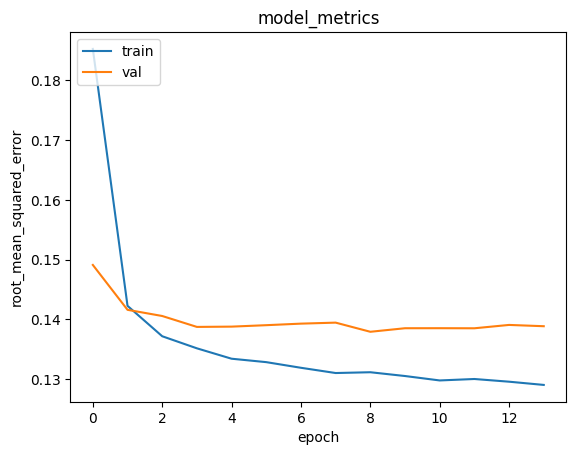

In [ ]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()



Berdasarkan plot tersebut, proses training model berhenti pada epoch ke 14 (epochs 1 dimulai dari nomor 0 pada plot) karena callbacks yang berisi early stopper. early stopper menghentikan proses training karena model tidak menunjukkan penurunan yang lebih keci dari val_root_mean_squared_error pada epochs ke-14 selama 5 epochs berturut-turut.

Kemudian, model pada epochs ke 14 yang dipertahankan karena pada epochs tersebut model memiliki performa yang terbaik. Berikut adalah hasil dari metriks pada epocs tersebut:

  * loss: 0.5141
  * root_mean_squared_error: 0.1280
  * val_loss: 0.5211
  * val_root_mean_squared_error: 0.1389
